### Różne rodzaje autoenkoderów

In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

## Prosty autoenkoder

Budowa modelu

In [3]:
encoding_dim = 15  # wymiar kodowania skompresowanego
input_img = Input(shape=(784,)) # warstwa wejsciowa
# reprezentacja zakodowana
encoded = Dense(encoding_dim, activation='relu')(input_img)
# reprezentacja zdekodowana
decoded = Dense(784, activation='sigmoid')(encoded)
# model autoenkodera
autoencoder = Model(input_img, decoded)

In [4]:
# Enkoder
encoder = Model(input_img, encoded)
# input dla dekodera
encoded_input = Input(shape=(encoding_dim,))
# ostatnia warstwa autoenkodera
decoder_layer = autoencoder.layers[-1]
# Dekoder
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Wczytanie danych

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Przykład elementu zbioru treningowego

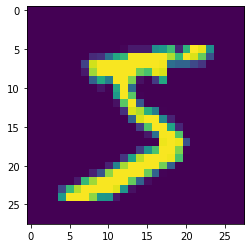

In [7]:
plt.imshow(x_train[0].reshape(28,28))

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 2s 7ms/step - loss: 0.3116 - val_loss: 0.2267
Epoch 2/15
235/235 [==============================] - 1s 6ms/step - loss: 0.2039 - val_loss: 0.1851
Epoch 3/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1751 - val_loss: 0.1636
Epoch 4/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1591 - val_loss: 0.1525
Epoch 5/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1511 - val_loss: 0.1470
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1470 - val_loss: 0.1440
Epoch 7/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1444 - val_loss: 0.1419
Epoch 8/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1425 - val_loss: 0.1402
Epoch 9/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1408 - val_loss: 0.1385
Epoch 10/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1393 - val_loss: 0.1372

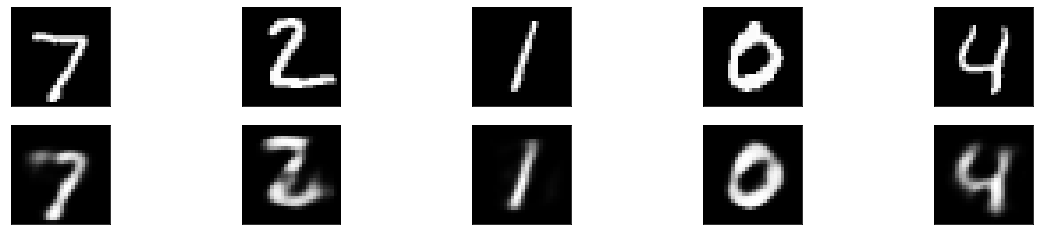

In [9]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    #wyswietlanie oryginalu
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # wyswietlanie rekonstrukcji
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Autoenkoder splotowy

In [10]:
model = Sequential()
# siec enkodera
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
# siec dekodera
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output 
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

In [11]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 70s 148ms/step - loss: 0.1226 - val_loss: 0.0795
Epoch 2/15
469/469 [==============================] - 69s 148ms/step - loss: 0.0777 - val_loss: 0.0752
Epoch 3/15
469/469 [==============================] - 69s 147ms/step - loss: 0.0747 - val_loss: 0.0730
Epoch 4/15
469/469 [==============================] - 69s 148ms/step - loss: 0.0729 - val_loss: 0.0717
Epoch 5/15
469/469 [==============================] - 69s 148ms/step - loss: 0.0717 - val_loss: 0.0706
Epoch 6/15
469/469 [==============================] - 69s 148ms/step - loss: 0.0709 - val_loss: 0.0699
Epoch 7/15
469/469 [==============================] - 69s 148ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 8/15
469/469 [==============================] - 70s 149ms/step - loss: 0.0697 - val_loss: 0.0689
Epoch 9/15
469/469 [==============================] - 69s 147ms/step - loss: 0.0693 - val_loss: 0.0687
Epoch 10/15
469/469 [==============================] - 69s 148ms/step - l

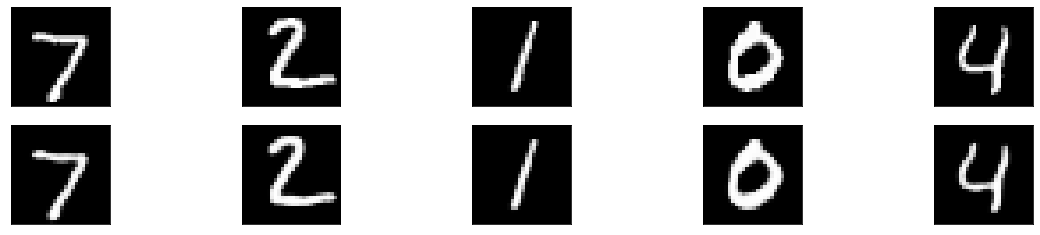

In [12]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Odszumiający autoenkoder

Zaszumianie:

In [13]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


Zaszumione obrazy wyświetlam:

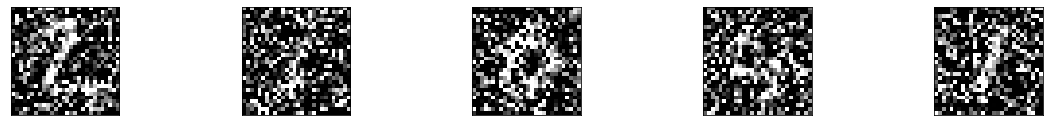

In [14]:
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
model = Sequential()
# enkoder
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#dekoder
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # wyjscie
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 81s 172ms/step - loss: 0.1864 - val_loss: 0.1439
Epoch 2/15
469/469 [==============================] - 80s 171ms/step - loss: 0.1400 - val_loss: 0.1359
Epoch 3/15
469/469 [==============================] - 80s 171ms/step - loss: 0.1343 - val_loss: 0.1312
Epoch 4/15
469/469 [==============================] - 81s 172ms/step - loss: 0.1311 - val_loss: 0.1289
Epoch 5/15
469/469 [==============================] - 81s 172ms/step - loss: 0.1290 - val_loss: 0.1270
Epoch 6/15
469/469 [==============================] - 80s 171ms/step - loss: 0.1274 - val_loss: 0.1255
Epoch 7/15
469/469 [==============================] - 86s 182ms/step - loss: 0.1263 - val_loss: 0.1247
Epoch 8/15
469/469 [==============================] - 86s 184ms/step - loss: 0.1252 - val_loss: 0.1236
Epoch 9/15
469/469 [==============================] - 86s 183ms/step - loss: 0.1245 - val_loss: 0.1231
Epoch 10/15
469/469 [==============================] - 81s 173ms/step - l

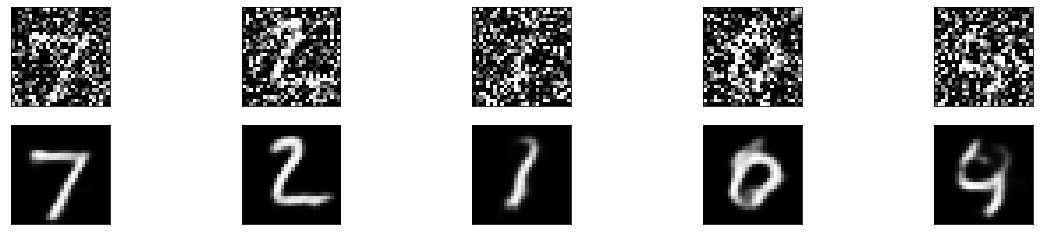

In [16]:
pred = model.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Autoenkoder wariancyjny

In [19]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
#from keras import objectives
from tensorflow.keras.datasets import mnist
import numpy as np

In [20]:
batch_size = 100
original_dim = 28*28
latent_dim = 2
intermediate_dim = 256
nb_epoch = 5
epsilon_std = 1.0

In [22]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [23]:
x = Input(shape=(original_dim,), name="input")
h = Dense(intermediate_dim, activation='relu', name="encoding")(x)
z_mean = Dense(latent_dim, name="mean")(h)
z_log_var = Dense(latent_dim, name="log-variance")(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
encoder = Model(x, [z_mean, z_log_var, z], name="encoder")

In [24]:
input_decoder = Input(shape=(latent_dim,), name="decoder_input")
decoder_h = Dense(intermediate_dim, activation='relu',
name="decoder_h")(input_decoder)
x_decoded = Dense(original_dim, activation='sigmoid',
name="flat_decoded")(decoder_h)
decoder = Model(input_decoder, x_decoded, name="decoder")

In [25]:
output_combined = decoder(encoder(x)[2])
vae = Model(x, output_combined)
vae.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 encoder (Functional)        [(None, 2),               201988    
                              (None, 2),                         
                              (100, 2)]                          
                                                                 
 decoder (Functional)        (None, 784)               202256    
                                                                 
Total params: 404,244
Trainable params: 404,244
Non-trainable params: 0
_________________________________________________________________


In [47]:
z_log_var

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'log-variance')>

In [29]:
from tensorflow.keras.metrics import binary_crossentropy

In [43]:
def vae_loss(x, x_decoded_mean, z_log_var, z_mean,
    original_dim=original_dim):
    xent_loss = original_dim * binary_crossentropy(
        x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(
        1 + z_log_var - K.square(z_mean) - K.exp(z_log_var),
        axis=-1)
    return xent_loss + kl_loss



In [44]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [46]:
#vae.fit(x_train, x_train,
#        shuffle=True,
#        epochs=nb_epoch,
#        batch_size=batch_size,
#        validation_data=(x_test, x_test),verbose=1)

Epoch 1/5


TypeError: in user code:

    File "/home/alicja/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)

    TypeError: tf__vae_loss() missing 2 required positional arguments: 'z_log_var' and 'z_mean'


### Autoenkoder wariancyjny jeszcze raz

In [48]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [49]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()


In [50]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)


In [51]:
train_size = 60000
batch_size = 32
test_size = 10000


In [52]:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))


In [53]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [54]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [55]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)


In [56]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


In [57]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]


Epoch: 10, Test set ELBO: -156.91856384277344, time elapse for current epoch: 33.34539270401001


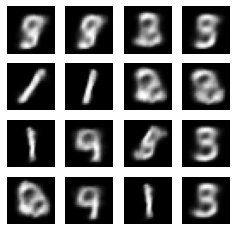

In [58]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)


(-0.5, 287.5, 287.5, -0.5)

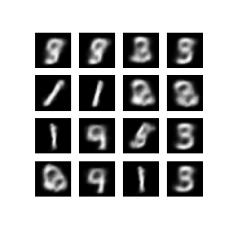

In [59]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images


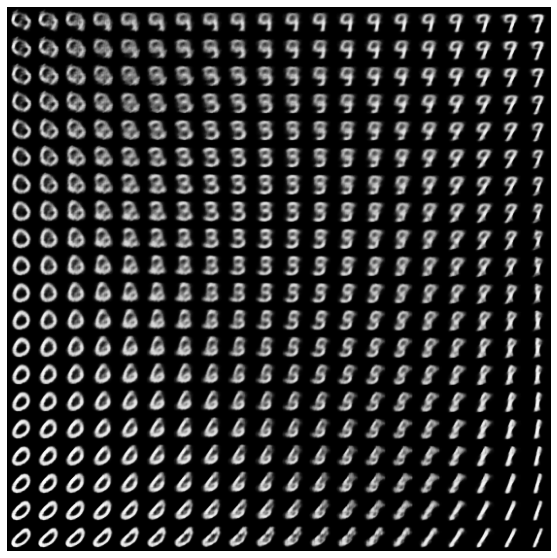

In [60]:
def plot_latent_images(model, n, digit_size=28):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()
plot_latent_images(model, 20)


### Wykrywanie anomalii

https://www.kaggle.com/code/tanmaymane18/autoencoder-for-anomaly-detection-tf-and-wandb/notebook

In [71]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tqdm import tqdm

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [87]:
train_file = './train.csv'
test_file = './test.csv'


In [88]:
test_df = pd.read_csv(test_file)

In [89]:
df = pd.read_csv(train_file)
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:


df['label'].value_counts()



1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [90]:


train_df, val_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['label'])



In [93]:
class encoder(keras.Model):
    def __init__(self):
        super(encoder, self).__init__()
        self.cnn1 = keras.layers.Conv2D(32, 3, strides=2, activation='relu', padding='same')
        self.cnn2 = keras.layers.Conv2D(64, 3, strides=2, activation='relu', padding='same')
        self.cnn3 = keras.layers.Conv2D(128, 3, strides=2, activation='relu')
    
    def call(self, x):
        x = self.cnn1(x)
        x = self.cnn2(x)     
        x = self.cnn3(x)        
        return x

In [94]:
class decoder(keras.Model):
    def __init__(self):
        super(decoder, self).__init__()
        self.cnnT1 = keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu')
        self.cnnT2 = keras.layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')
        self.cnnT3 = keras.layers.Conv2DTranspose(1, 3, strides=2, activation='relu', padding='same')
    
    def call(self, x):
        x = self.cnnT1(x)
        x = self.cnnT2(x)     
        x = self.cnnT3(x)          
        return x

In [95]:
class autoEncoder(keras.Model):
    def __init__(self):
        super(autoEncoder, self).__init__()
        self.encoder = encoder()
        self.decoder = decoder()
    
    def call(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [96]:
@tf.function
def make_2d(row):
    image = tf.reshape(row, (28, 28))
    image = tf.cast(image, tf.float64)/255.
    image = tf.expand_dims(image, axis=-1)
    return image


In [97]:
train_ds = tf.data.Dataset.from_tensor_slices(train_df.drop(columns='label')).map(make_2d).shuffle(5).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices(val_df.drop(columns='label')).map(make_2d).batch(1)


In [98]:


def ssim(input_img, output_img):
    return 1 - tf.reduce_mean(tf.image.ssim(input_img, tf.cast(output_img, tf.float64), max_val=1))



In [99]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model = autoEncoder()

Epoch 1: loss: 0.28989956662768407
Epoch 2: loss: 0.21597324320248196
Epoch 3: loss: 0.21214683407828921
Epoch 4: loss: 0.21017367669514248
Epoch 5: loss: 0.20910238169488451


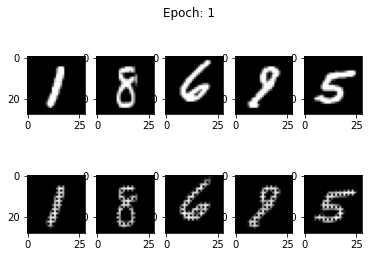

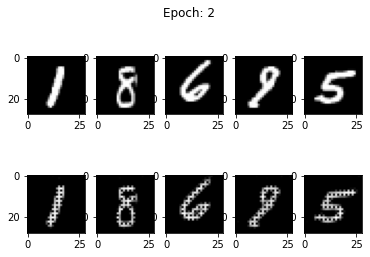

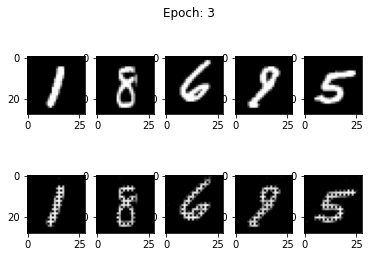

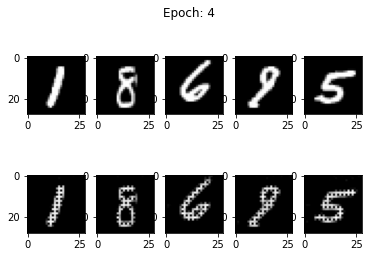

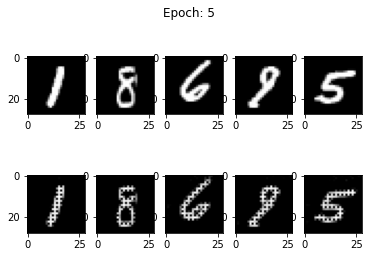

In [100]:
EPOCHS = 5

for epoch in range(EPOCHS):
    total_loss = 0
    for step, (image) in enumerate(train_ds):
        with tf.GradientTape() as tape:
            output = model(image, training=True)
            loss = ssim(image, output)
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        total_loss += loss.numpy()

    print(f"Epoch {epoch+1}: loss: {total_loss/(step+1)}")
   # wandb.log({"loss": total_loss/(step+1), "epoch": epoch+1})
    
    fig, ax = plt.subplots(2, 5)
    for step, (image) in enumerate(val_ds.take(5)):
        output = model(image, training=False)
        loss = ssim(image, output)
        ax[0][step].imshow(image.numpy()[0], cmap="gray")
        ax[1][step].imshow(output.numpy()[0], cmap="gray")
        fig.suptitle(f"Epoch: {epoch+1}")
    
   # wandb.log({"validation examples over training period": wandb.Image(fig)})

In [101]:
all_loss = []
for step, (image) in enumerate(val_ds):
    output = model(image, training=False)
    loss = ssim(image, output)
#    wandb.log({"val_loss_for_threshold": loss.numpy()})
    all_loss.append(loss.numpy())


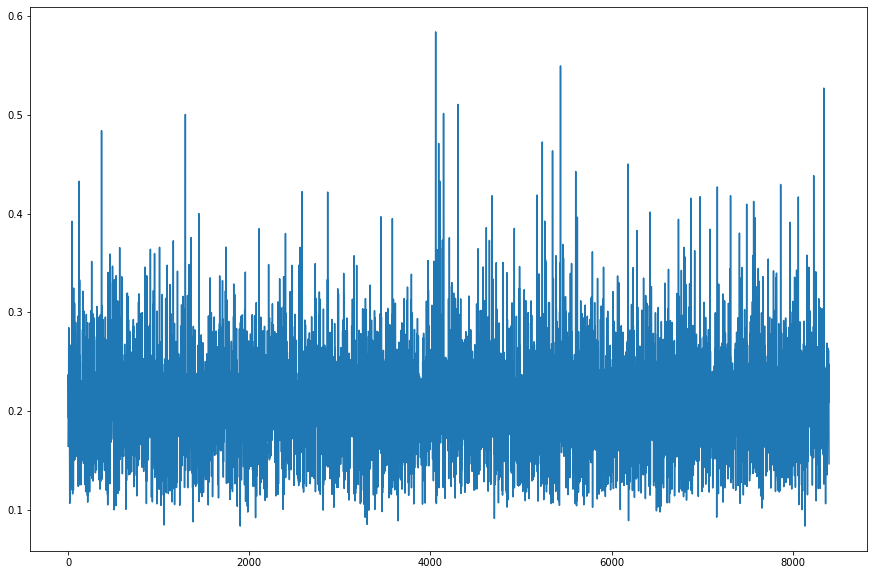

In [102]:


plt.figure(figsize=(15,10))
plt.plot(range(1, len(all_loss)+1), all_loss);



In [103]:
_99th_percentile = np.percentile(all_loss,q=99)
print(_99th_percentile)


0.3480613690614701


In [104]:


THRESH_LOSS = _99th_percentile



In [105]:
test_ds = tf.data.Dataset.from_tensor_slices(test_df.values).map(make_2d).batch(1)

<ipython-input-107-11bb172c787a>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2)


KeyboardInterrupt: 

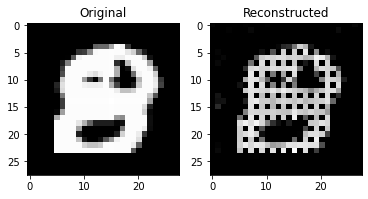

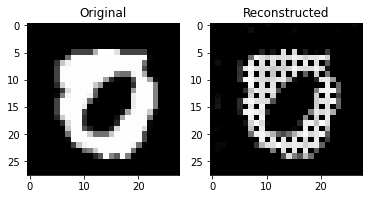

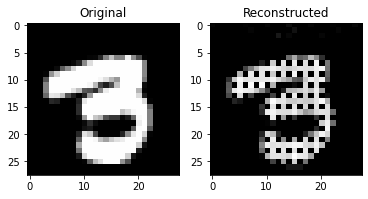

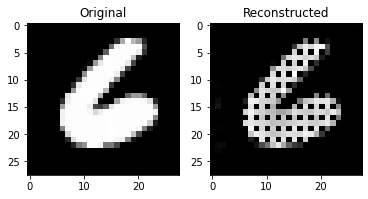

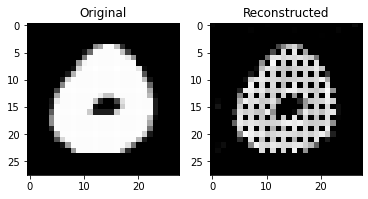

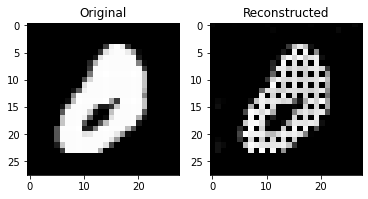

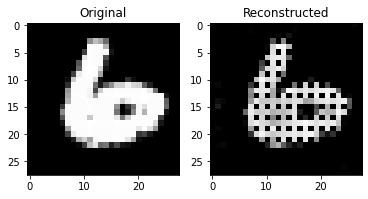

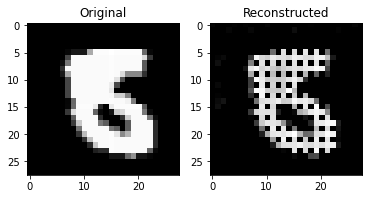

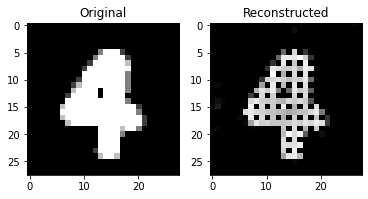

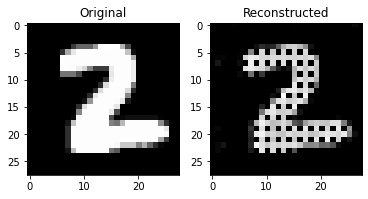

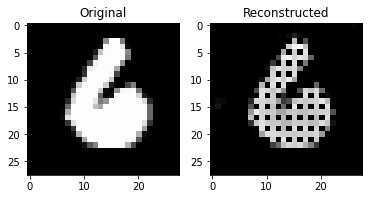

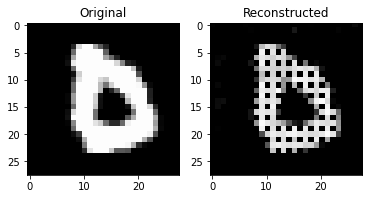

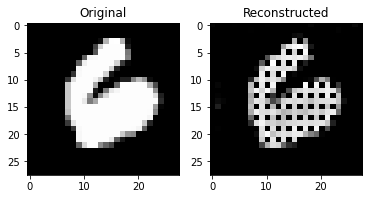

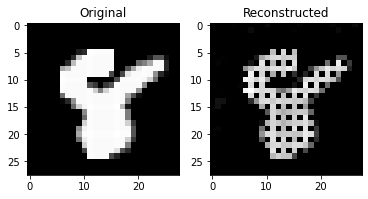

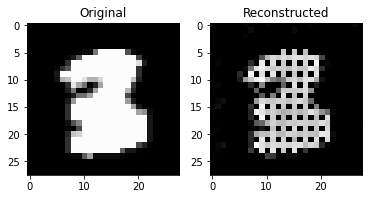

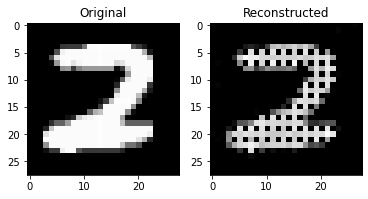

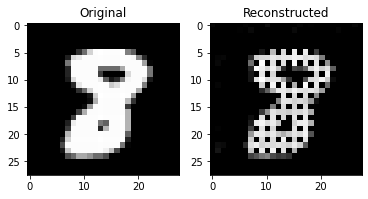

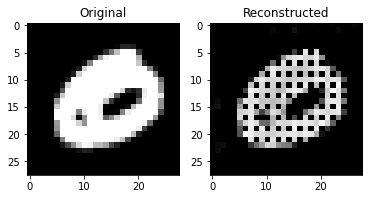

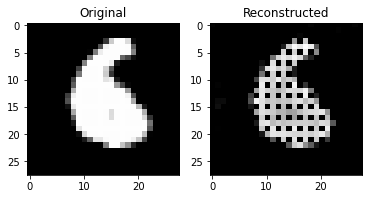

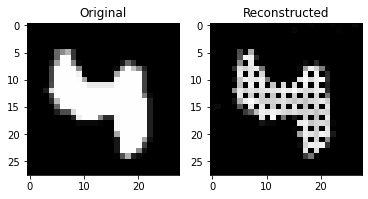

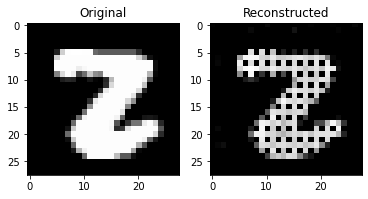

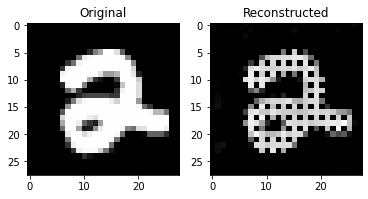

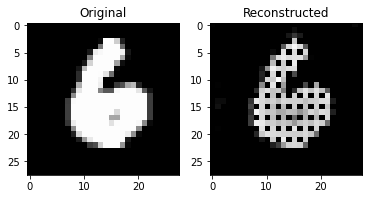

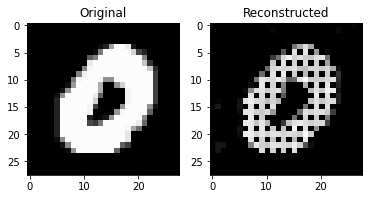

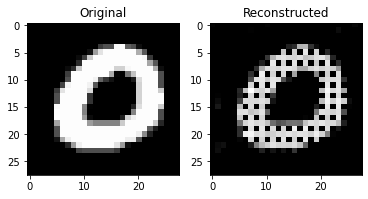

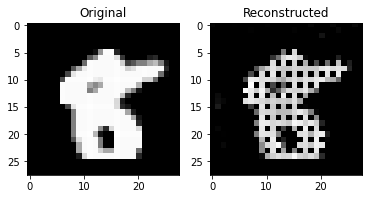

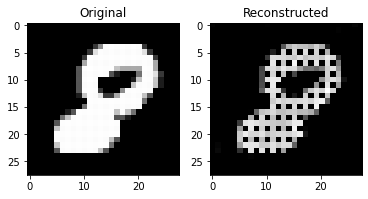

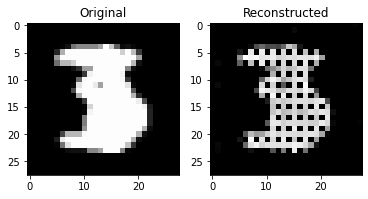

In [107]:


outliers = []
extreme_outliers = []
all_loss = []
for image in test_ds:
    output = model(image, training=False)
    loss = ssim(image, output)
    all_loss.append(loss.numpy())
   # wandb.log({"test_loss":loss.numpy()})
    if loss.numpy() > THRESH_LOSS:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(image.numpy()[0], cmap="gray")
        ax[0].title.set_text("Original")
        ax[1].imshow(output.numpy()[0], cmap="gray")
        ax[1].title.set_text("Reconstructed")
       # wandb_img = wandb.Image(fig, caption=f"Loss: {loss.numpy():.5f}")
        #if loss.numpy() < THRESH_LOSS+0.003:
            #wandb.log({"test_outlier_loss":loss.numpy()})
            #outliers.append(wandb_img)
            #continue
        #wandb.log({"extreme_test_outliers_loss":loss.numpy()})
        #extreme_outliers.append(wandb_img)
#wandb.log({"test_outliers":outliers})
#wandb.log({"extreme_test_outliers":extreme_outliers})



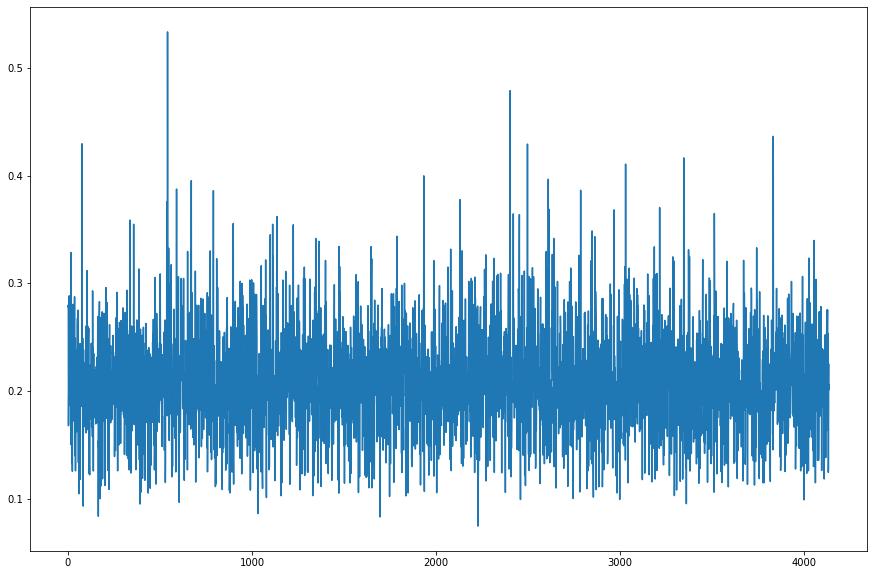

In [108]:


plt.figure(figsize=(15,10))
plt.plot(range(1, len(all_loss)+1), all_loss);

